In [1]:
# Done by Dnys Moroz 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from datetime import datetime

In [2]:
PREDICTION_DAYS = 60
# STOCK_TYPE_PREDICTION = 'Close'

In [3]:
# Change test_version to 1 and specify company name
test_version = 1

in_test_data = np.array([])
in_train_data = np.array([])

if test_version == 1:
    # Input company name you are curious about
    company = 'NFLX'

    # Define a start date and End Date
    start = datetime(2012, 1, 1)
    end = datetime(2020, 1, 1)
    
    test_start=datetime(2020, 1, 1)
    test_end=datetime.now()

    # Read Stock Price Data 
    in_train_data = yf.download(company, start , end)
    in_test_data = yf.download(company, test_start, test_end)
else: 
    # Default google stock prices
    in_train_data = pd.read_csv('Google_Stock_Price_Train.csv')
    in_test_data = pd.read_csv('Google_test_data.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Investigate input data
in_train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,10.040000,10.388571,10.018571,10.320000,10.320000,29213800
2012-01-04,10.335714,11.567143,10.258571,11.492857,11.492857,100489900
2012-01-05,11.345714,11.694286,11.040000,11.328571,11.328571,86552900
2012-01-06,11.302857,12.471429,11.242857,12.327143,12.327143,125610800
2012-01-09,12.801429,14.235714,12.448571,14.025714,14.025714,214073300
...,...,...,...,...,...,...
2019-12-24,334.010010,335.700012,331.600006,333.200012,333.200012,2019300
2019-12-26,334.600006,336.459991,332.010010,332.630005,332.630005,3589900
2019-12-27,332.959991,333.820007,326.010010,329.089996,329.089996,5036100


In [5]:
in_test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500
...,...,...,...,...,...,...
2023-01-04,298.239990,311.140015,295.510010,309.410004,309.410004,9345100
2023-01-05,307.000000,314.179993,304.549988,309.700012,309.700012,8328400
2023-01-06,311.570007,316.769989,303.690002,315.549988,315.549988,8949600


In [6]:
in_train_data.shape, in_test_data.shape

((2012, 6), (762, 6))

In [7]:
print(in_train_data.columns.tolist())

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


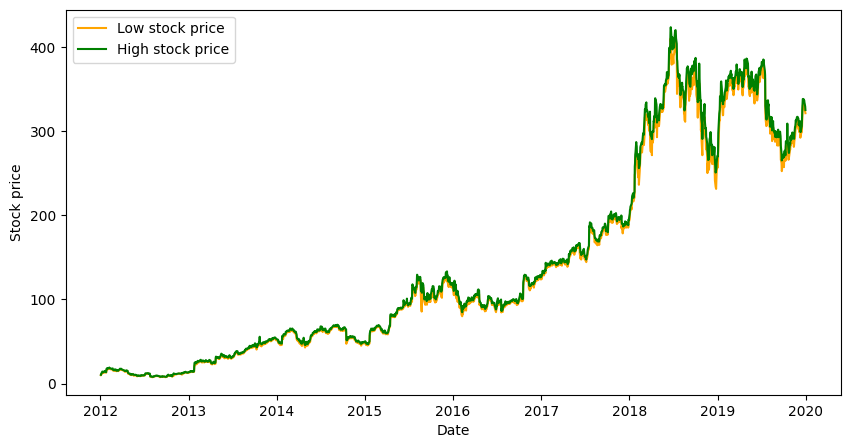

In [8]:
# visualize train data
plt.figure(figsize = (10, 5))
plt.plot(in_train_data['Low'], color='orange', label='Low stock price')
plt.plot(in_train_data['High'], color='green', label='High stock price')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [9]:
# Pre-pcosess data 
# Delete rows with null values (invalid values that are not numeric)

# train data
in_train_data["Close"] = pd.to_numeric(in_train_data.Close, errors='coerce')
in_train_data = in_train_data.dropna()

# test data
in_test_data["Close"] = pd.to_numeric(in_test_data.Close, errors='coerce')
in_test_data = in_test_data.dropna()

In [10]:
# Reshape to coulumn vector
train_data = in_train_data['Close'].values.reshape(-1,1)

In [11]:
train_data

array([[ 10.31999969],
       [ 11.49285698],
       [ 11.32857132],
       ...,
       [329.08999634],
       [323.30999756],
       [323.57000732]])

In [12]:
# Normalization train data
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data)

In [13]:
train_data, train_data.shape

(array([[0.00640502],
        [0.00925672],
        [0.00885727],
        ...,
        [0.78146502],
        [0.76741148],
        [0.76804367]]),
 (2012, 1))

In [14]:
# Split data on x_train and y_train
x_train = []
y_train = []

for i in range(PREDICTION_DAYS, train_data.shape[0]):
    x_train.append(train_data[i-PREDICTION_DAYS:i, 0]) 
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
# batch reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
x_train.shape

(1952, 60, 1)

In [17]:
# Model creating
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, return_sequences = False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [19]:
model.compile(
    optimizer='adam',
    loss="mean_squared_error")

In [20]:
# train model
model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/30
61/61 [==============================] - 15s 142ms/step - loss: 0.0128
Epoch 2/30
61/61 [==============================] - 10s 171ms/step - loss: 0.0023
Epoch 3/30
61/61 [==============================] - 9s 155ms/step - loss: 0.0024
Epoch 4/30
61/61 [==============================] - 10s 157ms/step - loss: 0.0020
Epoch 5/30
61/61 [==============================] - 9s 152ms/step - loss: 0.0020
Epoch 6/30
61/61 [==============================] - 9s 155ms/step - loss: 0.0022
Epoch 7/30
61/61 [==============================] - 9s 152ms/step - loss: 0.0024
Epoch 8/30
61/61 [==============================] - 10s 156ms/step - loss: 0.0018
Epoch 9/30
61/61 [==============================] - 9s 153ms/step - loss: 0.0018
Epoch 10/30
61/61 [==============================] - 9s 155ms/step - loss: 0.0018
Epoch 11/30
61/61 [==============================] - 9s 152ms/step - loss: 0.0018
Epoch 12/30
61/61 [==============================] - 9s 139ms/step - loss: 0.0016
Epoch 13/30
61/61 [==

In [21]:
# processing of test data
y_test = in_test_data['Close'].values.reshape(-1, 1)
total_records = pd.concat((in_train_data['Close'], in_test_data['Close']), axis=0)
test_data = total_records[len(total_records) - len(in_test_data) - PREDICTION_DAYS:].values
test_data = test_data.reshape(-1, 1)

In [22]:
test_data

array([[274.45999146],
       [270.72000122],
       [267.52999878],
       [280.48001099],
       [282.92999268],
       [285.52999878],
       [284.25      ],
       [286.27999878],
       [293.3500061 ],
       [275.29998779],
       [278.04998779],
       [266.69000244],
       [271.26998901],
       [271.5       ],
       [276.82000732],
       [281.85998535],
       [281.20999146],
       [291.45001221],
       [287.41000366],
       [286.80999756],
       [292.85998535],
       [288.02999878],
       [288.58999634],
       [289.57000732],
       [291.57000732],
       [294.17999268],
       [292.01000977],
       [283.10998535],
       [289.61999512],
       [295.02999878],
       [302.57000732],
       [302.6000061 ],
       [305.16000366],
       [311.69000244],
       [310.48001099],
       [315.54998779],
       [312.48999023],
       [315.92999268],
       [314.66000366],
       [309.98999023],
       [306.16000366],
       [304.32000732],
       [302.85998535],
       [307

In [23]:
#Normalize test data
test_data = scaler.transform(test_data)

In [24]:
test_data.shape

(822, 1)

In [25]:
# get data for test
x_test = []

for i in range(PREDICTION_DAYS,  test_data.shape[0]):
    x_test.append(test_data[i-PREDICTION_DAYS:i, 0])
    
x_test = np.array(x_test)

In [26]:
x_test

array([[0.64863717, 0.63954373, 0.63178753, ..., 0.78146502, 0.76741148,
        0.76804367],
       [0.63954373, 0.63178753, 0.6632743 , ..., 0.76741148, 0.76804367,
        0.78321563],
       [0.63178753, 0.6632743 , 0.6692312 , ..., 0.76804367, 0.78321563,
        0.77370882],
       ...,
       [0.50233934, 0.51833802, 0.54663961, ..., 0.69845678, 0.73361492,
        0.73432005],
       [0.51833802, 0.54663961, 0.54053678, ..., 0.73361492, 0.73432005,
        0.74854373],
       [0.54663961, 0.54053678, 0.57725106, ..., 0.73432005, 0.74854373,
        0.74761986]])

In [27]:
x_test.shape

(762, 60)

In [28]:
# batch reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
# prediction
prediction = model.predict(x_test)

24/24 [==============================] - 3s 56ms/step


In [30]:
# inverse normalized format
prices_prediction = scaler.inverse_transform(prediction)

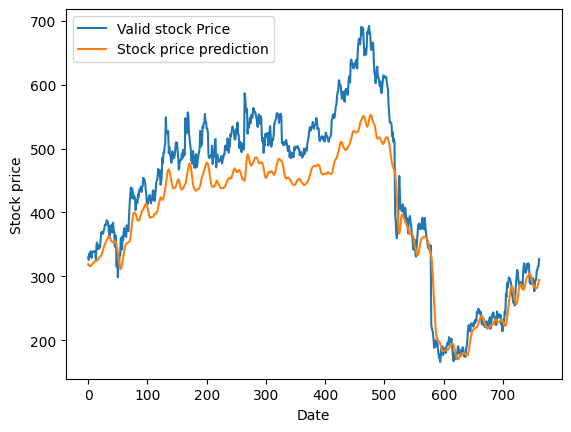

In [31]:
plt.plot(y_test, label = 'Valid stock Price')
plt.plot(prices_prediction, label = 'Stock price prediction')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.legend()
plt.show()